<a href="https://colab.research.google.com/github/ZahraDehghani99/ML_MSc/blob/main/HW5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Work 5-1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML/HW5/HW5.csv')
data.head()

,Age,WorkClass,FinancialWeight,Education,Education-num,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HourPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Recognize Type of each feature

In [ ]:
print(f'data shape : {data.shape}')
print(f'data columns type : \n {data.dtypes}')

data shape : (32561, 15)
data columns type : 
 Age                 int64
WorkClass          object
FinancialWeight     int64
Education          object
Education-num       int64
MaritalStatus      object
Occupation         object
Relationship       object
Race               object
Sex                object
CapitalGain         int64
CapitalLoss         int64
HourPerWeek         int64
NativeCountry      object
Income             object
dtype: object


From the output of above cell, we can see that `workclass`, `education`, `maritalstatus`, `occuption`, `relationship`, `race`, `sex`, `nativecountry` and `income` have data type of object and they are strings. 

In [ ]:
# Get a Dictionary containing the pairs of column names & data type objects.
dataType = dict(data.dtypes)

categorical = []
numerical = []

for i in dataType:
  if dataType[i] == 'O':
    categorical.append(i)
  else:
    numerical.append(i)  

print(f'columns with numerical values : \n{numerical}')
print(f'\ncolumns with string values : \n{categorical}')    

columns with numerical values : 
['Age', 'FinancialWeight', 'Education-num', 'CapitalGain', 'CapitalLoss', 'HourPerWeek']

columns with string values : 
['WorkClass', 'Education', 'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Sex', 'NativeCountry', 'Income']


In [ ]:
# see the type of one element in `Income` column
print(f'type of Income elements : {type(data.Income[0])}')

type of Income elements : <class 'str'>


## Recognize Missing Values


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   WorkClass        30725 non-null  object
 2   FinancialWeight  32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Education-num    32561 non-null  int64 
 5   MaritalStatus    32561 non-null  object
 6   Occupation       30718 non-null  object
 7   Relationship     32561 non-null  object
 8   Race             32561 non-null  object
 9   Sex              32561 non-null  object
 10  CapitalGain      32561 non-null  int64 
 11  CapitalLoss      32561 non-null  int64 
 12  HourPerWeek      32561 non-null  int64 
 13  NativeCountry    31978 non-null  object
 14  Income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
print(f'number of null values in data : {data.isnull().sum().sum()}')
print(f'number of null values in each columns : \n{data.isnull().sum()}')

number of null values in data : 4262
number of null values in each columns : 
Age                   0
WorkClass          1836
FinancialWeight       0
Education             0
Education-num         0
MaritalStatus         0
Occupation         1843
Relationship          0
Race                  0
Sex                   0
CapitalGain           0
CapitalLoss           0
HourPerWeek           0
NativeCountry       583
Income                0
dtype: int64


In [ ]:
data.Income.value_counts()

 <=50K    24720
 >50K      7841
Name: Income, dtype: int64

In [ ]:
data.describe()

,Age,FinancialWeight,Education-num,CapitalGain,CapitalLoss,HourPerWeek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


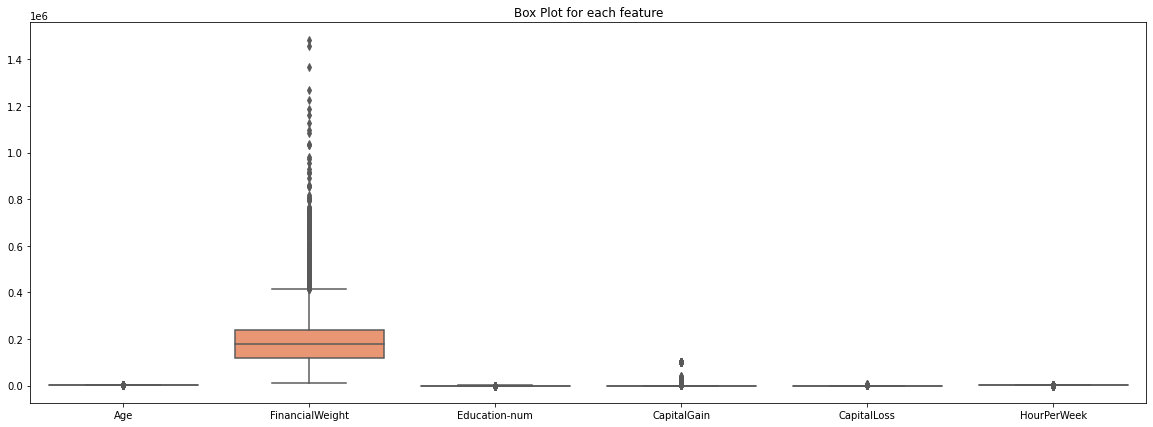

In [ ]:
# plot box plot to show outlier data
fig = plt.figure(figsize =(20, 7))
ax = sns.boxplot(data=data, orient="v", palette="Set2")
plt.title("Box Plot for each feature")
plt.show()

as we can see in the above plot, `FinancialWeight` and `CapitalGain` have outlier data.

### Treat missing values

In [ ]:
# fill null values of categorical features
miss_columns = ['WorkClass', 'Occupation', 'NativeCountry']
for i in miss_columns:
  mode = data[i].mode()[0]
  data[i].fillna(mode, inplace=True)

In [ ]:
data.head()

,Age,WorkClass,FinancialWeight,Education,Education-num,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HourPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.isnull().sum()

Age                0
WorkClass          0
FinancialWeight    0
Education          0
Education-num      0
MaritalStatus      0
Occupation         0
Relationship       0
Race               0
Sex                0
CapitalGain        0
CapitalLoss        0
HourPerWeek        0
NativeCountry      0
Income             0
dtype: int64

In [ ]:
# Save dataframe
# data.to_pickle('/content/drive/MyDrive/ML/HW5/data_preprocessed')

In [ ]:
#load the preprocessing dataframe
data = pd.read_pickle(r'/content/drive/MyDrive/ML/HW5/data_preprocessed')

In [ ]:
# let's see unique values for each column
for col in categorical:
  print(f'{col} => {data[col].unique()}')
  print("="*50)
  print("\n")

WorkClass => [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']


Education => [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


MaritalStatus => [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


Occupation => [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


Relationship => [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


Race => [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']


Sex => [' Male' ' Female']


NativeCountry => [' United-States' ' C

In [ ]:
data['Education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

## Split X and y

In [ ]:
X = data.drop(columns='Income')
y = pd.DataFrame(data['Income'])

print(f'X shape : {X.shape}')
print(f'y shape : {y.shape}')

X shape : (32561, 14)
y shape : (32561, 1)


## Create BaseLine model

In [ ]:
def baseline(X):
  y_pred = []
  for i in range(X.shape[0]): 
    y_pred.append(' <=50K')
  return y_pred

### Classification report 

In [ ]:
y_pred = baseline(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

       <=50K       0.76      1.00      0.86     24720
        >50K       0.00      0.00      0.00      7841

    accuracy                           0.76     32561
   macro avg       0.38      0.50      0.43     32561
weighted avg       0.58      0.76      0.66     32561

